In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 2-class data를 만들기 위해 각각 mean vector, cov matrix를 다르게 설정
mean1 = [1,-1]
cov1 = [[1,0],[0,1]]

mean2 = [-1,1]
cov2 = [[1,0],[0,1]]

In [3]:
# 만들어진 mean, cov를 바탕으로 input 데이터 생성 및 clss label 생성
x1 = np.random.multivariate_normal(mean1, cov1, 500)
x2 = np.random.multivariate_normal(mean2, cov2, 500)

In [4]:
y1 = np.ones(500)
y2 = -1*np.ones(500)

In [5]:
print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)

(500, 2)
(500, 2)
(500,)
(500,)


In [6]:
# 만들어진 두 클래스의 데이터를 합침
datax = np.concatenate((x1,x2), axis=0)
datay = np.concatenate((y1,y2), axis=0)

In [7]:
print(datax.shape)
print(datay.shape)

(1000, 2)
(1000,)


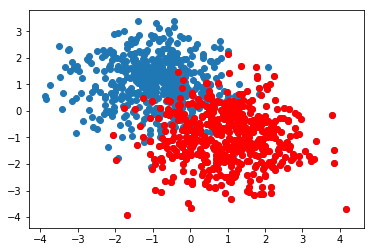

In [16]:
# 잘 만들어졌나 확인
plt.scatter(datax[:,0], datax[:,1])
plt.scatter(x1[:,0], x1[:,1], c="red")

In [8]:
# 학습을 하기 위해 train:test로 나누어 줌
n_data = datax.shape[0]
p_trn = 0.7
n_trn = round(n_data*p_trn)
print(n_data, p_trn, n_trn)

idx_array = np.array(range(0,n_data))
idx_array_perm = np.random.permutation(idx_array)
print(idx_array_perm[0:100])

trnx = datax[idx_array_perm[0:n_trn],:]
trny = datay[idx_array_perm[0:n_trn]]
tstx = datax[idx_array_perm[n_trn:n_data],:]
tsty = datay[idx_array_perm[n_trn:n_data]]

1000 0.7 700
[205 230 682 438  74 420 853 304 817 972 945 909  16 281 462 827  80 957
 404 297  56 476 734 279 450 151 840 584 872 280 220 464 528 820 377 706
 786 467 630 595 564 580 517  85  73 238 770 497 141 188 991  15 946   7
  65 440 678 132 331 207  66 932 161 982 361 644 307 168 589 524 197 912
 890  97 463 569 865 391 897 702 501 270 492 602 632 351 330 952 419  87
 577 722 144  31 637 329 979 246 933 754]


In [9]:
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(700, 2)
(300, 2)
(700,)
(300,)


In [10]:
from sklearn.naive_bayes import GaussianNB

clf_A = GaussianNB(priors=[0.7, 0.3])
clf_A.fit(trnx, trny)
tsty_hat_A = clf_A.predict(tstx)

In [11]:
dif = tsty - tsty_hat_A
accuracy_A = 1 - (np.size(np.where(dif != 0))/np.size(tsty))
print(accuracy_A)

0.9033333333333333


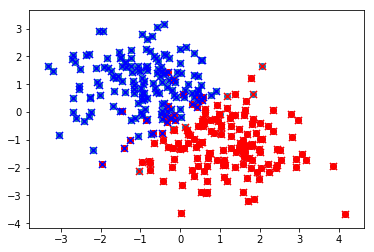

In [12]:
plt.scatter(tstx[:,0], tstx[:,1])
plt.scatter(tstx[np.where(tsty==1),0], tstx[np.where(tsty==1),1], c="red")
plt.scatter(tstx[np.where(tsty_hat_A==1),0], tstx[np.where(tsty_hat_A==1),1], c="red", marker='x', s=50)
plt.scatter(tstx[np.where(tsty_hat_A==-1),0], tstx[np.where(tsty_hat_A==-1),1], c="blue", marker='x',s=50)

In [13]:
clf_B = GaussianNB(priors=[0.1, 0.9])
clf_B.fit(trnx, trny)
tsty_hat_B = clf_B.predict(tstx)

In [14]:
dif = tsty - tsty_hat_B
accuracy_B = 1 - (np.size(np.where(dif != 0))/np.size(tsty))
print(accuracy_B)

0.85


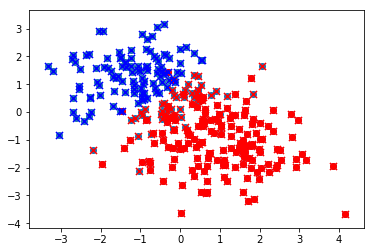

In [15]:
plt.scatter(tstx[:,0], tstx[:,1])
plt.scatter(tstx[np.where(tsty==1),0], tstx[np.where(tsty==1),1], c="red")
plt.scatter(tstx[np.where(tsty_hat_B==1),0], tstx[np.where(tsty_hat_B==1),1], c="red", marker='x', s=50)
plt.scatter(tstx[np.where(tsty_hat_B==-1),0], tstx[np.where(tsty_hat_B==-1),1], c="blue", marker='x',s=50)